**Imports des données**

In [1]:
import numpy as np
import json
import pprint
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

filename_path = 'data/df.csv'
df = pd.read_csv(filename_path)

In [2]:
df.head()

,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,SiteEnergyUseWN(kBtu),GHGEmissions(MetricTonsCO2e),ENERGYSTARScore
0,NonResidential,Hotel,7,Downtown,1927,1.0,12.0,88434,0,88434,Hotel,88434.0,0.0,0.0,7456910.0,249.98,60.0
1,NonResidential,Hotel,7,Downtown,1996,1.0,11.0,103566,15064,88502,Hotel,83880.0,15064.0,4622.0,8664479.0,295.86,61.0
2,NonResidential,Hotel,7,Downtown,1969,1.0,41.0,956110,196718,759392,Hotel,756493.0,0.0,0.0,73937112.0,2089.28,43.0
3,NonResidential,Hotel,7,Downtown,1926,1.0,10.0,61320,0,61320,Hotel,61320.0,0.0,0.0,6946800.5,286.43,56.0
4,NonResidential,Hotel,7,Downtown,1980,1.0,18.0,175580,62000,113580,Hotel,123445.0,68009.0,0.0,14656503.0,505.01,75.0


**Parametres divers**

In [3]:
pd.set_option('display.max_columns', 55)
pd.set_option('display.max_colwidth', 100)

**Fonctions utilisateurs**

In [4]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_poisson_deviance
from sklearn.metrics import mean_gamma_deviance
from sklearn.metrics import mean_tweedie_deviance

def get_errors(y_true,y_pred):    
    errors = y_pred-y_true
    errors_absolute = np.abs(errors)
    errors_relative= errors_absolute/np.abs(y_true)
    errors_normalized = errors/np.mean(y_true)

    data = {'y_true' : y_true ,
            'y_pred' : y_pred ,
            'errors' : errors,
            'errors_abs' : errors_absolute,
            'errors_normalized' : errors_normalized,
            'errors_relative' : errors_relative}
    
    return pd.DataFrame(data)

def get_metrics(y_true, y_pred, index , decimals=3):
    
    """
    Calcul de toutes les métriques de Regression
    

            Parameters
            ----------
            
            y_true : array-like
                valeurs observées
            y_pred : array-like
                valeurs prédites
            index : string
                nom/valeur de l'index
            decimals: number
                valeur de précision d'arrondissement des metriques

            Returns
            ----------
            
            metrics : DataFrame
                Renvoie les metriques de régression

    """  
    dict_metrics = {}
    
    results = get_errors(y_true,y_pred)
    df = results.describe(percentiles=[0.05, 0.25,0.50, 0.75, 0.95])
    
    dict_metrics["Min"]=df.loc["min","errors_relative"]
    dict_metrics["5%"]=df.loc["5%","errors_relative"]
    dict_metrics["25%"]=df.loc["25%","errors_relative"]
    dict_metrics["50%"]=df.loc["50%","errors_relative"]
    dict_metrics["75%"]=df.loc["75%","errors_relative"]
    dict_metrics["95%"]=df.loc["95%","errors_relative"]
    dict_metrics["Max"]=df.loc["max","errors_relative"]    
    
    #dict_metrics['explained_variance_score']=explained_variance_score(y_true,y_pred)
    #dict_metrics['max_error']=max_error(y_true,y_pred)
    #dict_metrics['mean_absolute_error']=mean_absolute_error(y_true,y_pred)
    #dict_metrics['normalized_mean_absolute_error']=mean_absolute_error(y_true,y_pred)/np.mean(y_true)
    #dict_metrics['mean_squared_error']=mean_squared_error(y_true,y_pred)
    dict_metrics['root_mean_squared_error']=mean_squared_error(y_true,y_pred,squared=False)
    #dict_metrics['normalized_root_mean_squared_error']=mean_squared_error(y_true,y_pred,squared=False)/np.mean(y_true)
    #dict_metrics['median_absolute_error']=median_absolute_error(y_true,y_pred)
    #dict_metrics['normalized_median_absolute_error']=median_absolute_error(y_true,y_pred)/np.mean(y_true)
    dict_metrics['r2_score']=r2_score(y_true,y_pred)
    #dict_metrics['mean_squared_log_error']=mean_squared_log_error(y_true,y_pred)
    #dict_metrics['mean_poisson_deviance']=mean_poisson_deviance(y_true,y_pred)
    #dict_metrics['mean_gamma_deviance']=mean_gamma_deviance(y_true,y_pred)
    #dict_metrics['mean_tweedie_deviance']=mean_tweedie_deviance(y_true,y_pred)
    
    metrics = pd.DataFrame(dict_metrics, index=[index])
    
    return metrics.round(decimals)

In [5]:
from math import ceil,sqrt,floor

def get_colors_from_listedcolormap(colormap, x):
        
    """
    Retourne un nombre x de couleurs avec un espacement homogene contenus dans une colormap
    
    """
    colors = []
    for i in range(0,x):
        if x <2:
            y=1
        else:
            y=i/(x-1)
        colors.append(COLORMAP.colors[floor((COLORMAP.N-1)*y)])
    return colors

#Mes couleurs
COLORMAP = sns.color_palette("plasma", as_cmap=True)
COLORS = get_colors_from_listedcolormap(COLORMAP,5)
COLOR_PRIMARY = COLORS[0]
COLOR_SECONDARY = COLORS[1]
COLOR_TERTIARY = COLORS[4]
COLOR_QUATERNARY = COLORS[2]
COLOR_QUINARY = COLORS[3]

**Choix des prédicteurs**   

In [6]:
all_columns = [
    'BuildingType',
    'PrimaryPropertyType',
    'CouncilDistrictCode',
    'Neighborhood',
    'YearBuilt',
    'NumberofBuildings',
    'NumberofFloors',
    'PropertyGFATotal',
    'PropertyGFAParking',
    'PropertyGFABuilding(s)',
    'LargestPropertyUseType',
    'LargestPropertyUseTypeGFA',
    'SecondLargestPropertyUseTypeGFA',
    'ThirdLargestPropertyUseTypeGFA',
    'SiteEnergyUseWN(kBtu)',
    'GHGEmissions(MetricTonsCO2e)',
    'ENERGYSTARScore']

In [7]:
predicators_columns = [
    'BuildingType',
    'PrimaryPropertyType',
    'CouncilDistrictCode',
    'Neighborhood',
    'YearBuilt',
    'NumberofBuildings',
    'NumberofFloors',
    'PropertyGFATotal',
    'PropertyGFAParking',
    'PropertyGFABuilding(s)',
    'LargestPropertyUseTypeGFA',
    'SecondLargestPropertyUseTypeGFA',
    'ThirdLargestPropertyUseTypeGFA']

target_columns = [
    'SiteEnergyUseWN(kBtu)','GHGEmissions(MetricTonsCO2e)']

In [8]:
#only for test energyscore => drop to 4802
#df= df.dropna()

In [9]:
X = df.loc[:, predicators_columns]
y = df.loc[:, target_columns[0]]

In [10]:
X.shape

(6293, 13)

**Pré-traitement**
_______________________________

**Détection des valeurs aberrantes ( Outlier Detection )**

In [11]:
#Ne pas utiliser dans le cadre de ce projet
"""from sklearn.neighbors import LocalOutlierFactor

local_outlier_factor = LocalOutlierFactor(n_neighbors=20, contamination=0.01)

labels = local_outlier_factor.fit_predict(X.select_dtypes(include=[np.number]))

print(f'Nombre d\'outliers : {np.count_nonzero(labels == -1)}')
print(f'Nombre d\'inliers : {np.count_nonzero(labels == 1)}')

X = X[labels == 1]
y = y[labels == 1]"""

"from sklearn.neighbors import LocalOutlierFactor\n\nlocal_outlier_factor = LocalOutlierFactor(n_neighbors=20, contamination=0.01)\n\nlabels = local_outlier_factor.fit_predict(X.select_dtypes(include=[np.number]))\n\nprint(f'Nombre d'outliers : {np.count_nonzero(labels == -1)}')\nprint(f'Nombre d'inliers : {np.count_nonzero(labels == 1)}')\n\nX = X[labels == 1]\ny = y[labels == 1]"

In [12]:
X.shape

(6293, 13)

**Transformation : encodage des catégories et mise à l'échelle des valeurs numériques**

In [13]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

X_categorical = X.select_dtypes(exclude=[np.number]).reset_index(drop=True)
X_numerical = X.select_dtypes(include=[np.number]).reset_index(drop=True)

one_hot_encoder = OneHotEncoder(sparse=False)
X_categorical = one_hot_encoder.fit_transform(X_categorical)
X_categorical = pd.DataFrame(X_categorical, columns=one_hot_encoder.get_feature_names().ravel())

columns= X_numerical.columns
standard_scaler_X = StandardScaler().fit(X_numerical)
X_numerical = standard_scaler_X.transform(X_numerical)
X_numerical = pd.DataFrame(X_numerical, columns=columns)


X = X_numerical.join(X_categorical)

In [14]:
X.sample(10)

,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,x0_Campus,x0_Multifamily HR (10+),x0_Multifamily LR (1-4),x0_Multifamily MR (5-9),x0_NonResidential,x0_Nonresidential COS,x0_Nonresidential WA,x0_SPS-District K-12,x1_College/University,x1_Distribution Center,x1_Distribution Center\n,x1_High-Rise Multifamily,x1_Hospital,x1_Hotel,x1_K-12 School,x1_Laboratory,x1_Large Office,...,x1_Residence Hall,x1_Residence Hall/Dormitory,x1_Restaurant,x1_Restaurant\n,x1_Retail Store,x1_Self-Storage Facility,x1_Self-Storage Facility\n,x1_Senior Care Community,x1_Small- and Mid-Sized Office,x1_Supermarket / Grocery Store,x1_Supermarket/Grocery Store,x1_University,x1_Warehouse,x1_Worship Facility,x2_Ballard,x2_Central,x2_Delridge,x2_Downtown,x2_East,x2_Greater duwamish,x2_Lake union,x2_Magnolia / queen anne,x2_North,x2_Northeast,x2_Northwest,x2_Southeast,x2_Southwest
5465,1.206318,-2.077325,-0.079863,-0.125044,-0.387261,-0.279442,-0.368991,-0.396314,-0.277604,0.045076,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
673,-1.153739,-1.530454,-0.079863,-0.308214,0.112185,-0.279442,0.200949,0.057081,-0.324433,-0.117642,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5331,-1.625750,1.203898,-0.079863,0.424467,0.442513,0.972853,0.251072,0.160130,0.625576,-0.171608,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5323,-1.153739,-0.072133,-0.079863,-0.491384,-0.387045,-0.279442,-0.368745,-0.341779,-0.350163,-0.171608,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2414,-1.153739,-0.558240,-0.079863,-0.674554,-0.369091,-0.279442,-0.348257,-0.336336,-0.314141,-0.171608,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5785,-1.153739,-1.803889,-0.079863,-0.308214,-0.472590,-0.279442,-0.466364,-0.531402,-0.214308,0.309709,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1289,-0.681728,-1.165874,-0.079863,-0.308214,-0.344778,-0.279442,-0.320512,-0.337574,-0.013484,-0.171608,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3101,-0.681728,1.386188,1.080822,0.424467,1.263161,0.821731,1.226992,1.656324,0.612763,1.004246,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1257,1.206318,-0.041751,-0.079863,-0.125044,-0.341595,-0.279442,-0.316879,-0.378217,-0.227893,-0.171608,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1620,-0.681728,-1.864653,-0.079863,-0.308214,-0.460598,-0.279442,-0.452680,-0.430838,-0.350163,-0.171608,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


___
### Séparation du jeu de données
___

In [15]:
from sklearn.model_selection import train_test_split
random_state=99
X_train, X_valtest, y_train, y_valtest = train_test_split(X, y, test_size=0.2, random_state=random_state)
X_val, X_test, y_val, y_test = train_test_split(X_valtest, y_valtest, test_size=0.5, random_state=random_state)

___
### Modélisation et optimisation principale
Mise en place de la validation croisée et d'une méthode d'optimisation à l'aide d'une grille paramétrable
___


In [16]:
scoring='neg_root_mean_squared_error'

**0) régression baseline**

In [17]:
from sklearn.dummy import DummyRegressor

dummy_regression = DummyRegressor(strategy="mean")
dummy_regression.fit(X_train,y_train)

y_pred_val = dummy_regression.predict(X_val)

In [18]:
regression_report = get_metrics(y_val, y_pred_val, 'dummy_regression_on_val')

In [19]:
y_pred_train = dummy_regression.predict(X_train)
regression_report = regression_report.append(get_metrics(y_train, y_pred_train, 'dummy_regression_on_train'))

**1) régression linéaire multiple**

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

linear_regression = LinearRegression()

hyperparameters = dict()

gscv_linear_regression = GridSearchCV(linear_regression, hyperparameters, cv=KFold(5,shuffle=True, random_state=random_state), scoring=scoring)

gscv_linear_regression.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=99, shuffle=True),
             estimator=LinearRegression(), param_grid={},
             scoring='neg_root_mean_squared_error')

In [21]:
y_pred_train = gscv_linear_regression.predict(X_train)
regression_report = regression_report.append(get_metrics(y_train, y_pred_train, 'linear_regression_on_train'))

In [22]:
y_pred_val = gscv_linear_regression.predict(X_val)
regression_report = regression_report.append(get_metrics(y_val, y_pred_val, 'linear_regression_on_val'))

**2) régression ridge**

In [23]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge_regression = Ridge()

n_alphas = 100
alpha = np.logspace(-2, 8, n_alphas)

hyperparameters = dict(alpha=alpha)

gscv_ridge_regression = GridSearchCV(ridge_regression, hyperparameters, cv=KFold(5,shuffle=True, random_state=random_state), scoring=scoring)

gscv_ridge_regression.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=99, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-02, 1.26185688e-02, 1.59228279e-02, 2.00923300e-02,
       2.53536449e-02, 3.19926714e-02, 4.03701726e-02, 5.09413801e-02,
       6.42807312e-02, 8.11130831e-02, 1.02353102e-01, 1.29154967e-01,
       1.62975083e-01, 2.05651231e-01, 2.59502421e-01, 3.27454916e-01,
       4....
       4.75081016e+05, 5.99484250e+05, 7.56463328e+05, 9.54548457e+05,
       1.20450354e+06, 1.51991108e+06, 1.91791026e+06, 2.42012826e+06,
       3.05385551e+06, 3.85352859e+06, 4.86260158e+06, 6.13590727e+06,
       7.74263683e+06, 9.77009957e+06, 1.23284674e+07, 1.55567614e+07,
       1.96304065e+07, 2.47707636e+07, 3.12571585e+07, 3.94420606e+07,
       4.97702356e+07, 6.28029144e+07, 7.92482898e+07, 1.00000000e+08])},
             scoring='neg_root_mean_squared_error')

In [24]:
print('coefficients: ', gscv_ridge_regression.best_estimator_.coef_.flatten())
print('alpha: ', gscv_ridge_regression.best_estimator_.get_params()['alpha'])
print('score moyen sur cv: ', gscv_ridge_regression.best_score_)

y_pred_val = gscv_ridge_regression.predict(X_val)
regression_report = regression_report.append(get_metrics(y_val, y_pred_val, 'gscv_ridge_regression_on_val'))

coefficients:  [ 4.76384343e+03  1.78967990e+05  3.79616120e+05  4.51922293e+05
 -3.15282584e+06 -2.34162893e+06 -2.98670515e+06  1.22510602e+07
  3.25251912e+06  3.58189104e+06  1.40197562e+07 -2.80144717e+06
 -4.32208026e+06 -5.03742822e+06  2.39736290e+05 -1.72633605e+06
 -1.23379986e+05 -2.48820764e+05 -3.68353871e+06 -5.66736995e+06
 -5.12650998e+06 -5.97072810e+06  9.51424320e+07 -1.69108315e+06
 -5.77327843e+06  7.19195400e+06 -7.26148127e+06 -1.69987189e+06
 -6.35696106e+05 -2.15697699e+06 -4.34974044e+06 -5.87171361e+06
 -1.83943460e+06  3.68601326e+04 -2.42840104e+06 -4.15909158e+06
 -5.50589460e+06 -2.42408193e+06 -2.52995389e+06 -4.63318324e+06
 -6.15700302e+06 -6.38757846e+06 -8.70174707e+05 -5.10181707e+06
  3.05891384e+06  3.63821293e+06 -5.45411288e+06 -6.17382203e+06
 -5.51583526e+06 -8.93229298e+05 -4.88988923e+04 -5.46806295e+05
  9.40543939e+05  1.39998667e+06 -7.13030637e+05  9.55805864e+05
  2.78257741e+05 -7.31563843e+05  3.90422682e+05 -5.51295907e+05
 -3.702204

In [25]:
y_pred_train = gscv_ridge_regression.predict(X_train)
regression_report = regression_report.append(get_metrics(y_train, y_pred_train, 'gscv_ridge_regression_on_train'))

**3) régression lasso**

In [26]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso_regression = Lasso()

n_alphas = 100
alpha = np.logspace(-2, 8, n_alphas)
max_iter = [10000]

hyperparameters = dict(alpha=alpha, max_iter=max_iter)

gscv_lasso_regression = GridSearchCV(lasso_regression, hyperparameters, cv=KFold(5,shuffle=True, random_state=random_state), scoring=scoring)

gscv_lasso_regression.fit(X_train,y_train)

C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0424364724484608e+16, tolerance: 104543341710907.8
  model = cd_fast.enet_coordinate_descent(
C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.771924287551504e+16, tolerance: 92239692293426.53
  model = cd_fast.enet_coordinate_descent(
C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0236031358078698e+17, tolerance: 107936318517292.1
  model = cd_fast.enet_coordinate_descent(
C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: Con

C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.2436258845193384e+16, tolerance: 93142709643948.67
  model = cd_fast.enet_coordinate_descent(
C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.044028605515664e+16, tolerance: 120280443864697.69
  model = cd_fast.enet_coordinate_descent(
C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0424375259027424e+16, tolerance: 104543341710907.8
  model = cd_fast.enet_coordinate_descent(
C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: Co

C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.7719293221984896e+16, tolerance: 92239692293426.53
  model = cd_fast.enet_coordinate_descent(
C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0236041161689213e+17, tolerance: 107936318517292.1
  model = cd_fast.enet_coordinate_descent(
C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.243634347839483e+16, tolerance: 93142709643948.67
  model = cd_fast.enet_coordinate_descent(
C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: Con

C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.044060513688486e+16, tolerance: 120280443864697.69
  model = cd_fast.enet_coordinate_descent(
C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0424538810726848e+16, tolerance: 104543341710907.8
  model = cd_fast.enet_coordinate_descent(
C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.771945909957213e+16, tolerance: 92239692293426.53
  model = cd_fast.enet_coordinate_descent(
C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: Con

C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.295374806474614e+16, tolerance: 107936318517292.1
  model = cd_fast.enet_coordinate_descent(
C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.243767257430237e+16, tolerance: 93142709643948.67
  model = cd_fast.enet_coordinate_descent(
C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.044164569784483e+16, tolerance: 120280443864697.69
  model = cd_fast.enet_coordinate_descent(
C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: Conv

C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.042657766107984e+16, tolerance: 104543341710907.8
  model = cd_fast.enet_coordinate_descent(
C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0244322551083808e+16, tolerance: 92239692293426.53
  model = cd_fast.enet_coordinate_descent(
C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.059832157975808e+16, tolerance: 107936318517292.1
  model = cd_fast.enet_coordinate_descent(
C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: Conv

C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0251311424080832e+16, tolerance: 92239692293426.53
  model = cd_fast.enet_coordinate_descent(
C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0253551117007232e+16, tolerance: 92239692293426.53
  model = cd_fast.enet_coordinate_descent(
C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1955120995693248.0, tolerance: 92239692293426.53
  model = cd_fast.enet_coordinate_descent(
C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: Conver

GridSearchCV(cv=KFold(n_splits=5, random_state=99, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': array([1.00000000e-02, 1.26185688e-02, 1.59228279e-02, 2.00923300e-02,
       2.53536449e-02, 3.19926714e-02, 4.03701726e-02, 5.09413801e-02,
       6.42807312e-02, 8.11130831e-02, 1.02353102e-01, 1.29154967e-01,
       1.62975083e-01, 2.05651231e-01, 2.59502421e-01, 3.27454916e-01,
       4....
       1.20450354e+06, 1.51991108e+06, 1.91791026e+06, 2.42012826e+06,
       3.05385551e+06, 3.85352859e+06, 4.86260158e+06, 6.13590727e+06,
       7.74263683e+06, 9.77009957e+06, 1.23284674e+07, 1.55567614e+07,
       1.96304065e+07, 2.47707636e+07, 3.12571585e+07, 3.94420606e+07,
       4.97702356e+07, 6.28029144e+07, 7.92482898e+07, 1.00000000e+08]),
                         'max_iter': [10000]},
             scoring='neg_root_mean_squared_error')

In [27]:
print('coefficients: ', gscv_lasso_regression.best_estimator_.coef_.flatten())
print('alpha: ', gscv_lasso_regression.best_estimator_.get_params()['alpha'])
print('score moyen sur cv: ', gscv_lasso_regression.best_score_)

y_pred_val = gscv_lasso_regression.predict(X_val)
regression_report = regression_report.append(get_metrics(y_val, y_pred_val, 'gscv_lasso_regression_on_val'))

coefficients:  [ 1.26114629e+05  1.34917181e+05  3.93191631e+05  3.81994793e+05
 -5.97558089e+06 -1.47987448e+06 -0.00000000e+00  1.16518250e+07
  3.10884398e+06  3.57980700e+06  1.42803590e+07 -0.00000000e+00
 -0.00000000e+00 -8.75133347e+05  1.66504162e+06 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -1.77395282e+06  1.07641156e+08  2.55687501e+06
 -0.00000000e+00  0.00000000e+00 -1.98634449e+06  1.13064155e+05
  2.91914336e+06 -0.00000000e+00 -0.00000000e+00 -7.45420156e+05
  0.00000000e+00  4.49020627e+06  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  1.37856738e+06 -1.88570866e+05
  5.60484302e+06  5.23819360e+06 -0.00000000e+00 -1.04441053e+06
 -2.08486993e+05 -5.76217234e+05 -0.00000000e+00 -0.00000000e+00
  7.02985669e+05  1.33000692e+06 -5.17864436e+05  6.69665190e+05
  0.00000000e+00 -3.79066011e+05  1.56895900e+05 -3.45505062e+05
 -0.000000

In [28]:
y_pred_train = gscv_lasso_regression.predict(X_train)
regression_report = regression_report.append(get_metrics(y_train, y_pred_train, 'gscv_lasso_regression_on_train'))

C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0474265565273402e+17, tolerance: 143200580758891.78
  model = cd_fast.enet_coordinate_descent(
C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0474265714983208e+17, tolerance: 143200580758891.78
  model = cd_fast.enet_coordinate_descent(
C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0474265891211216e+17, tolerance: 143200580758891.78
  model = cd_fast.enet_coordinate_descent(
C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529:

C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1932316911935514e+17, tolerance: 143200580758891.78
  model = cd_fast.enet_coordinate_descent(
C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1932320871242744e+17, tolerance: 143200580758891.78
  model = cd_fast.enet_coordinate_descent(
C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1932325317698162e+17, tolerance: 143200580758891.78
  model = cd_fast.enet_coordinate_descent(
C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529:

C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1933104089228005e+17, tolerance: 143200580758891.78
  model = cd_fast.enet_coordinate_descent(
C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.193320388350305e+17, tolerance: 143200580758891.78
  model = cd_fast.enet_coordinate_descent(
C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1933315729058675e+17, tolerance: 143200580758891.78
  model = cd_fast.enet_coordinate_descent(
C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: 

C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0481720296987053e+17, tolerance: 143200580758891.78
  model = cd_fast.enet_coordinate_descent(
C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.4310131192664e+16, tolerance: 143200580758891.78
  model = cd_fast.enet_coordinate_descent(
C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.883076087161242e+16, tolerance: 143200580758891.78
  model = cd_fast.enet_coordinate_descent(
C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: Con

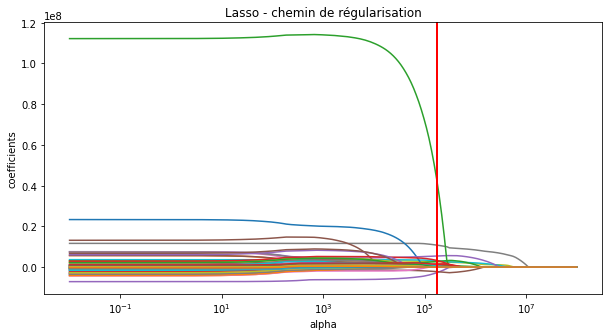

In [29]:
# modelisation sans gridsearch() pour voir l'effet sur les coeff

n_alphas = 200
alphas = np.logspace(-2, 8, n_alphas)
lasso_regression = Lasso(fit_intercept=False)

coefs = []
errors = []
for a in alphas:
    lasso_regression.set_params(alpha=a)
    lasso_regression.fit(X_train, y_train)
    coefs.append(lasso_regression.coef_.flatten())
    errors.append(np.mean((lasso_regression.predict(X_val) - y_val) ** 2))
    
# Affiche le chemin de régularisation
alpha_min = alphas[np.argmin(errors)]
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(alphas, coefs)

plt.axvline(x=alpha_min,linewidth=2, color='r')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.title('Lasso - chemin de régularisation')
plt.axis('tight')
plt.show()

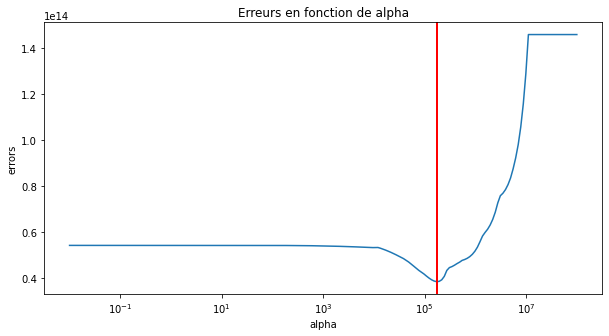

In [30]:
# Affiche la courbe d'erreurs en fonction de la régularisation
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(alphas, errors)

plt.axvline(x=alpha_min,linewidth=2, color='r')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('errors')
plt.title('Erreurs en fonction de alpha')
plt.axis('tight')
plt.show()

**4) régression elasticnet**

In [31]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

elasticnet_regression = ElasticNet()

n_alphas = 100
alpha = np.logspace(-2, 8, n_alphas)
l1_ratio = np.arange(0.1,1,0.1)
max_iter = [10000]


hyperparameters = dict(alpha=alpha, l1_ratio=l1_ratio , max_iter=max_iter)

gscv_elasticnet_regression = GridSearchCV(elasticnet_regression, hyperparameters, cv=KFold(5,shuffle=True, random_state=random_state), scoring=scoring)

gscv_elasticnet_regression.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=99, shuffle=True),
             estimator=ElasticNet(),
             param_grid={'alpha': array([1.00000000e-02, 1.26185688e-02, 1.59228279e-02, 2.00923300e-02,
       2.53536449e-02, 3.19926714e-02, 4.03701726e-02, 5.09413801e-02,
       6.42807312e-02, 8.11130831e-02, 1.02353102e-01, 1.29154967e-01,
       1.62975083e-01, 2.05651231e-01, 2.59502421e-01, 3.27454916e-...
       3.05385551e+06, 3.85352859e+06, 4.86260158e+06, 6.13590727e+06,
       7.74263683e+06, 9.77009957e+06, 1.23284674e+07, 1.55567614e+07,
       1.96304065e+07, 2.47707636e+07, 3.12571585e+07, 3.94420606e+07,
       4.97702356e+07, 6.28029144e+07, 7.92482898e+07, 1.00000000e+08]),
                         'l1_ratio': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'max_iter': [10000]},
             scoring='neg_root_mean_squared_error')

In [32]:
print('coefficients: ', gscv_elasticnet_regression.best_estimator_.coef_.flatten())
print('alpha: ', gscv_elasticnet_regression.best_estimator_.get_params()['alpha'])
print('l1_ratio: ', gscv_elasticnet_regression.best_estimator_.get_params()['l1_ratio'])
print('max_iter: ', gscv_elasticnet_regression.best_estimator_.get_params()['max_iter'])
print('tol: ', gscv_elasticnet_regression.best_estimator_.get_params()['tol'])
print('score moyen RMSE sur cv: ', -gscv_elasticnet_regression.best_score_)

y_pred_val = gscv_elasticnet_regression.predict(X_val)
regression_report = regression_report.append(get_metrics(y_val, y_pred_val, 'gscv_elasticnet_regression_on_val'))

coefficients:  [-2.63638543e+04  1.91132678e+05  4.39878078e+05  2.74599083e+05
 -3.34455781e+06 -2.52386976e+06 -3.15791745e+06  1.30930416e+07
  3.35864127e+06  3.52487417e+06  1.17328227e+07 -3.08701151e+06
 -3.65032442e+06 -4.24070463e+06  7.91633159e+05 -1.26312497e+06
 -8.97870155e+04 -1.93467275e+05 -3.04479106e+06 -4.73878936e+06
 -4.17700752e+06 -4.55089158e+06  7.58867230e+07 -1.22165480e+06
 -4.97114197e+06  4.67804057e+06 -6.91608182e+06 -1.27490075e+06
 -1.38664554e+05 -1.87234698e+06 -3.46437934e+06 -5.17338058e+06
 -7.83744921e+05  5.26847166e+05 -1.55589549e+06 -3.28552471e+06
 -4.09025087e+06 -1.18347285e+06 -1.37302394e+06 -4.13506932e+06
 -4.96641951e+06 -5.18264650e+06 -6.27167625e+05 -4.46038298e+06
  3.22908194e+06  3.60855970e+06 -4.42810376e+06 -5.51743437e+06
 -4.79589621e+06 -8.19589393e+05  8.68322775e+04 -7.06425438e+05
  9.34408853e+05  1.48390072e+06 -9.31544817e+05  9.86151208e+05
  3.11780358e+05 -7.57568238e+05  4.78765572e+05 -5.31447193e+05
 -4.698732

In [33]:
y_pred_train = gscv_elasticnet_regression.predict(X_train)
regression_report = regression_report.append(get_metrics(y_train, y_pred_train, 'gscv_elasticnet_regression_on_train'))

**5) support vector regression**

In [34]:
from sklearn.svm import SVR

svr = SVR()


n_gammas = 8
gamma = np.logspace(-8, 10, n_gammas)

n_epsilons = 5
epsilon = np.logspace(-3, 1, n_epsilons)

n_C = 5
C = np.logspace(-3, 2, n_C)


hyperparameters = dict(gamma=gamma, epsilon=epsilon , C=C)

gscv_svr = GridSearchCV(svr, hyperparameters, cv=KFold(5,shuffle=True, random_state=random_state), scoring=scoring)

gscv_svr.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=99, shuffle=True),
             estimator=SVR(),
             param_grid={'C': array([1.00000000e-03, 1.77827941e-02, 3.16227766e-01, 5.62341325e+00,
       1.00000000e+02]),
                         'epsilon': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01]),
                         'gamma': array([1.00000000e-08, 3.72759372e-06, 1.38949549e-03, 5.17947468e-01,
       1.93069773e+02, 7.19685673e+04, 2.68269580e+07, 1.00000000e+10])},
             scoring='neg_root_mean_squared_error')

In [35]:
y_pred_val = gscv_svr.predict(X_val)
regression_report = regression_report.append(get_metrics(y_val, y_pred_val, 'gscv_svr_on_val'))

In [36]:
y_pred_train = gscv_svr.predict(X_train)
regression_report = regression_report.append(get_metrics(y_train, y_pred_train, 'gscv_svr_on_train'))

**6) random forest regressor**

In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rfr = RandomForestRegressor()

n_estimators = [100,200,300]
#max_depth = [5,15,30,45]
max_depth = [None]
min_samples_leaf = [1,3,5,10]
max_features = ['auto', 'sqrt']

hyperparameters = dict(n_estimators=n_estimators, min_samples_leaf=min_samples_leaf , max_features=max_features , max_depth=max_depth)

gscv_rfr = GridSearchCV(rfr, hyperparameters, cv=KFold(5,shuffle=True, random_state=random_state), scoring=scoring)

gscv_rfr.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=99, shuffle=True),
             estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 3, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_root_mean_squared_error')

In [38]:
print('score moyen RMSE sur cv: ', -gscv_rfr.best_score_)
print('cv_results_: ', gscv_rfr.cv_results_)
print('best_params_: ', gscv_rfr.best_params_)

score moyen RMSE sur cv:  6878288.572683441
cv_results_:  {'mean_fit_time': array([2.66750188, 5.31483507, 8.08157783, 2.1566627 , 4.26919723,
       6.36916866, 1.84774146, 3.73434682, 5.78696561, 1.51465988,
       3.10522456, 4.58861103, 0.62572913, 1.26260529, 1.85258121,
       0.38759017, 0.7716897 , 1.19181805, 0.36097522, 0.70298939,
       1.03727922, 0.31453204, 0.61213918, 0.94840865]), 'std_fit_time': array([0.02932664, 0.06014728, 0.14203927, 0.0377168 , 0.0374706 ,
       0.05206281, 0.0120764 , 0.07566649, 0.07150113, 0.01568105,
       0.09166779, 0.10264564, 0.007489  , 0.01499974, 0.03819424,
       0.0057351 , 0.0088089 , 0.01854095, 0.00442641, 0.00677199,
       0.01064076, 0.00631732, 0.00592098, 0.02171966]), 'mean_score_time': array([0.02298293, 0.04452462, 0.0684236 , 0.01776652, 0.0339396 ,
       0.04976349, 0.01561694, 0.03012505, 0.04497752, 0.01434565,
       0.0271173 , 0.03798447, 0.02296729, 0.0446044 , 0.06693263,
       0.01535897, 0.02942328, 0.04349

In [39]:
X_val.shape

(629, 62)

In [40]:
y_pred_val = gscv_rfr.predict(X_val)
regression_report = regression_report.append(get_metrics(y_val, y_pred_val, 'gscv_rfr_on_val'))

In [41]:
y_pred_train = gscv_rfr.predict(X_train)
regression_report = regression_report.append(get_metrics(y_train, y_pred_train, 'gscv_rfr_on_train'))

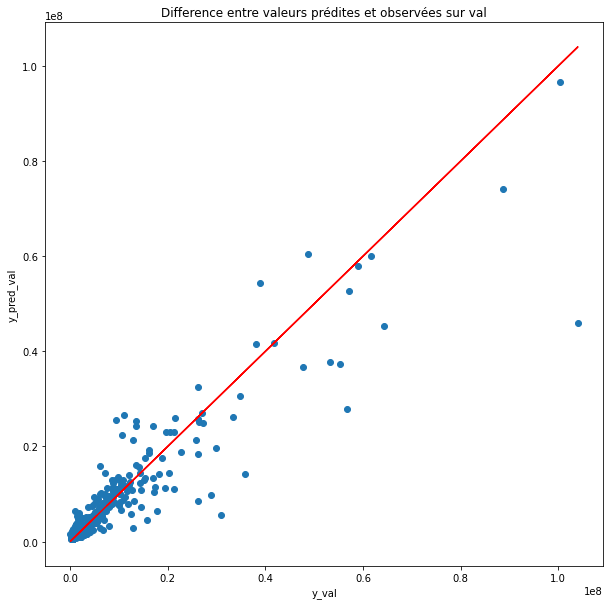

In [42]:
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(y_val, y_pred_val)
ax.plot(y_val, y_val, 'r')
plt.xlabel('y_val')
plt.ylabel('y_pred_val')
plt.title('Difference entre valeurs prédites et observées sur val')

plt.show()

___
### Evaluation / Comparaison des modèles
___

**Rapport de regression**

<AxesSubplot:title={'center':'Train - Rapport de regression'}>

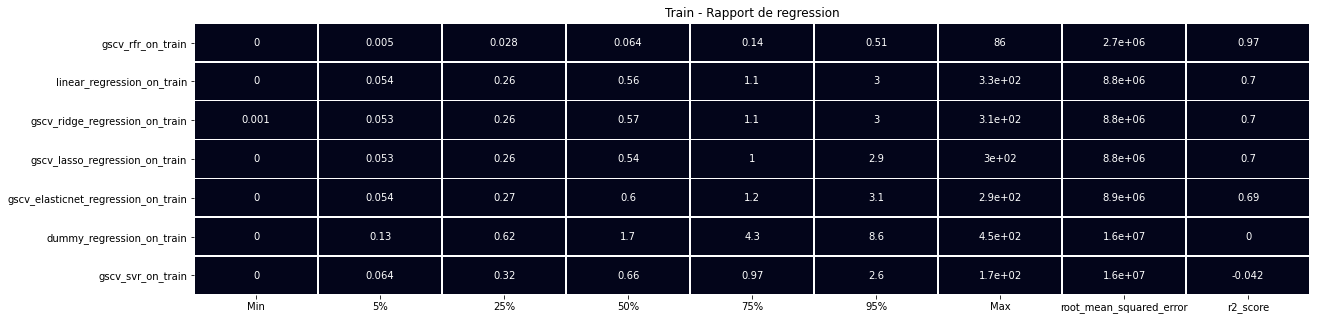

In [43]:
rr = regression_report[regression_report.index.str.contains('train$')].sort_values(by=['r2_score'], ascending=False)
fig, ax = plt.subplots(figsize=(20,5))
plt.title('Train - Rapport de regression')
sns.heatmap(rr,vmin=regression_report.max().Max,vmax=regression_report.max().Max, annot=True, cbar=None,linewidths=.5)

<AxesSubplot:title={'center':'Val - Rapport de regression'}>

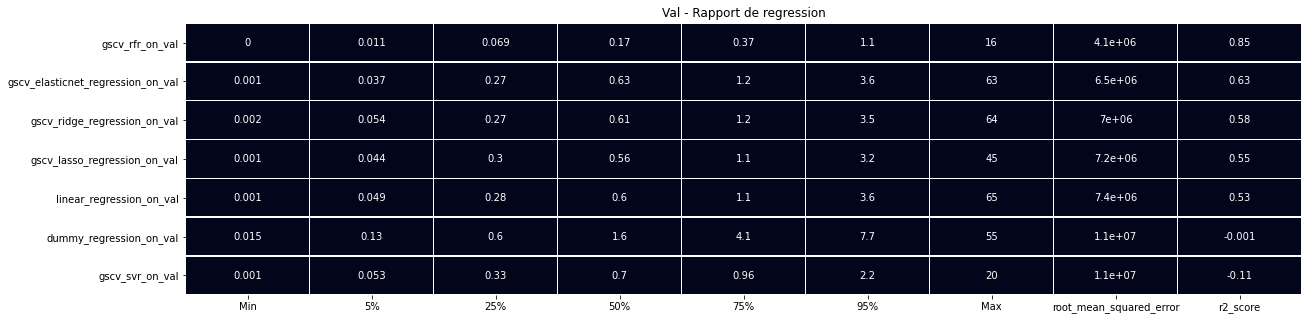

In [44]:
rr = regression_report[regression_report.index.str.contains('val$')].sort_values(by=['r2_score'], ascending=False)
fig, ax = plt.subplots(figsize=(20,5))
plt.title('Val - Rapport de regression')
sns.heatmap(rr,vmin=regression_report.max().Max,vmax=regression_report.max().Max, annot=True, cbar=None,linewidths=.5)

**Analyse des erreurs**

In [48]:
df_errors_val = X_val.copy()
df_errors_val = df_errors_val.join(get_errors(y_val,y_pred_val))

In [49]:
#analyse des données avec inverse_transform
_1 = df_errors_val[ df_errors_val['errors_relative'] >= 2]
_2 = pd.DataFrame(standard_scaler_X.inverse_transform(_1.iloc[:,0:10]), index=_1.index, columns=_1.columns[0:10])
df_errors_val = pd.concat([_2, _1.iloc[:,10:]], axis=1)

In [50]:
df_errors_val.describe()

,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,x0_Campus,x0_Multifamily HR (10+),x0_Multifamily LR (1-4),x0_Multifamily MR (5-9),x0_NonResidential,x0_Nonresidential COS,x0_Nonresidential WA,x0_SPS-District K-12,x1_College/University,x1_Distribution Center,x1_Distribution Center\n,x1_High-Rise Multifamily,x1_Hospital,x1_Hotel,x1_K-12 School,x1_Laboratory,x1_Large Office,...,x1_Self-Storage Facility\n,x1_Senior Care Community,x1_Small- and Mid-Sized Office,x1_Supermarket / Grocery Store,x1_Supermarket/Grocery Store,x1_University,x1_Warehouse,x1_Worship Facility,x2_Ballard,x2_Central,x2_Delridge,x2_Downtown,x2_East,x2_Greater duwamish,x2_Lake union,x2_Magnolia / queen anne,x2_North,x2_Northeast,x2_Northwest,x2_Southeast,x2_Southwest,y_true,y_pred,errors,errors_abs,errors_normalized,errors_relative
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,1.300000e+01,13.0,13.0,13.0,13.0,13.000000,13.000000,13.0,13.0,13.0,13.0,13.000000,13.0,13.0,13.0,13.0,13.0,13.0,...,13.000000,13.0,13.0,13.0,13.0,13.0,13.000000,13.0,13.0,13.0,13.000000,13.000000,13.000000,13.000000,13.0,13.000000,13.000000,13.0,13.000000,13.000000,13.0,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01,13.000000,13.000000
mean,3.692308,1958.615385,1.076923,1.846154,51063.923077,3200.000000,47863.923077,48257.538462,1825.307692,-2.273737e-13,0.0,0.0,0.0,0.0,0.846154,0.153846,0.0,0.0,0.0,0.0,0.076923,0.0,0.0,0.0,0.0,0.0,0.0,...,0.076923,0.0,0.0,0.0,0.0,0.0,0.230769,0.0,0.0,0.0,0.076923,0.076923,0.076923,0.307692,0.0,0.076923,0.230769,0.0,0.076923,0.076923,0.0,6.463423e+05,2.802161e+06,2.155819e+06,2.155819e+06,0.391869,5.388260
std,2.056883,27.097166,0.277350,1.143544,39637.036442,11537.764081,41115.858959,32560.720950,4035.875646,0.000000e+00,0.0,0.0,0.0,0.0,0.375534,0.375534,0.0,0.0,0.0,0.0,0.277350,0.0,0.0,0.0,0.0,0.0,0.0,...,0.277350,0.0,0.0,0.0,0.0,0.0,0.438529,0.0,0.0,0.0,0.277350,0.277350,0.277350,0.480384,0.0,0.277350,0.438529,0.0,0.277350,0.277350,0.0,5.780225e+05,1.927275e+06,1.431441e+06,1.431441e+06,0.260197,4.286563
min,1.000000,1910.000000,1.000000,1.000000,11285.000000,0.000000,11285.000000,11285.000000,0.000000,-2.273737e-13,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,9.385100e+04,6.731355e+05,5.473825e+05,5.473825e+05,0.099499,2.152208
25%,2.000000,1949.000000,1.000000,1.000000,32100.000000,0.000000,29400.000000,25000.000000,0.000000,-2.273737e-13,0.0,0.0,0.0,0.0,1.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,1.294669e+05,1.455311e+06,1.325844e+06,1.325844e+06,0.241002,2.534206
50%,3.000000,1966.000000,1.000000,2.000000,33344.000000,0.000000,33344.000000,33332.000000,0.000000,-2.273737e-13,0.0,0.0,0.0,0.0,1.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,5.281157e+05,2.189767e+06,1.739647e+06,1.739647e+06,0.316220,3.113086
75%,5.000000,1977.000000,1.000000,2.000000,55700.000000,0.000000,55700.000000,55700.000000,984.000000,-2.273737e-13,0.0,0.0,0.0,0.0,1.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,9.249800e+05,3.383424e+06,2.458444e+06,2.458444e+06,0.446878,5.830075
max,7.000000,2000.000000,2.000000,5.000000,154330.000000,41600.000000,154330.000000,108000.000000,11061.000000,-2.273737e-13,0.0,0.0,0.0,0.0,1.000

In [52]:
df_errors_val

,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,x0_Campus,x0_Multifamily HR (10+),x0_Multifamily LR (1-4),x0_Multifamily MR (5-9),x0_NonResidential,x0_Nonresidential COS,x0_Nonresidential WA,x0_SPS-District K-12,x1_College/University,x1_Distribution Center,x1_Distribution Center\n,x1_High-Rise Multifamily,x1_Hospital,x1_Hotel,x1_K-12 School,x1_Laboratory,x1_Large Office,...,x1_Self-Storage Facility\n,x1_Senior Care Community,x1_Small- and Mid-Sized Office,x1_Supermarket / Grocery Store,x1_Supermarket/Grocery Store,x1_University,x1_Warehouse,x1_Worship Facility,x2_Ballard,x2_Central,x2_Delridge,x2_Downtown,x2_East,x2_Greater duwamish,x2_Lake union,x2_Magnolia / queen anne,x2_North,x2_Northeast,x2_Northwest,x2_Southeast,x2_Southwest,y_true,y_pred,errors,errors_abs,errors_normalized,errors_relative
4755,5.0,1977.0,1.0,2.0,33344.0,0.0,33344.0,31360.0,984.0,-2.273737e-13,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.245830e+05,1.385009e+06,1.260426e+06,1.260426e+06,0.229111,10.117160
402,2.0,2000.0,1.0,1.0,53040.0,41600.0,11440.0,51427.0,0.0,-2.273737e-13,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.901429e+06,5.993701e+06,4.092272e+06,4.092272e+06,0.743862,2.152208
4161,2.0,1963.0,1.0,2.0,20047.0,0.0,20047.0,20047.0,0.0,-2.273737e-13,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.257530e+05,6.731355e+05,5.473825e+05,5.473825e+05,0.099499,4.352838
3695,2.0,1960.0,1.0,1.0,110613.0,0.0,110613.0,99551.0,11061.0,-2.273737e-13,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.023418e+06,6.442468e+06,5.419050e+06,5.419050e+06,0.985034,5.295051
5323,2.0,1966.0,1.0,2.0,33332.0,0.0,33332.0,33332.0,0.0,-2.273737e-13,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.640180e+05,2.503665e+06,1.739647e+06,1.739647e+06,0.316220,2.276971
5504,3.0,1910.0,1.0,3.0,32100.0,0.0,32100.0,21400.0,10700.0,-2.273737e-13,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.385100e+04,1.615275e+06,1.521424e+06,1.521424e+06,0.276553,16.211056
3186,5.0,1949.0,1.0,1.0,11285.0,0.0,11285.0,11285.0,0.0,-2.273737e-13,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7.059837e+05,2.692340e+06,1.986356e+06,1.986356e+06,0.361065,2.813600
2049,1.0,1982.0,1.0,2.0,36600.0,0.0,36600.0,43556.0,0.0,-2.273737e-13,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.206066e+05,2.189767e+06,1.869161e+06,1.869161e+06,0.339762,5.830075
2499,5.0,1972.0,1.0,1.0,29400.0,0.0,29400.0,25000.0,0.0,-2.273737e-13,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.275095e+05,9.357661e+05,7.082566e+05,7.082566e+05,0.128742,3.113086
1569,5.0,1977.0,2.0,2.0,33344.0,0.0,33344.0,31360.0,984.0,-2.273737e-13,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.294669e+05,1.455311e+06,1.325844e+06,1.325844e+06,0.241002,10.240795


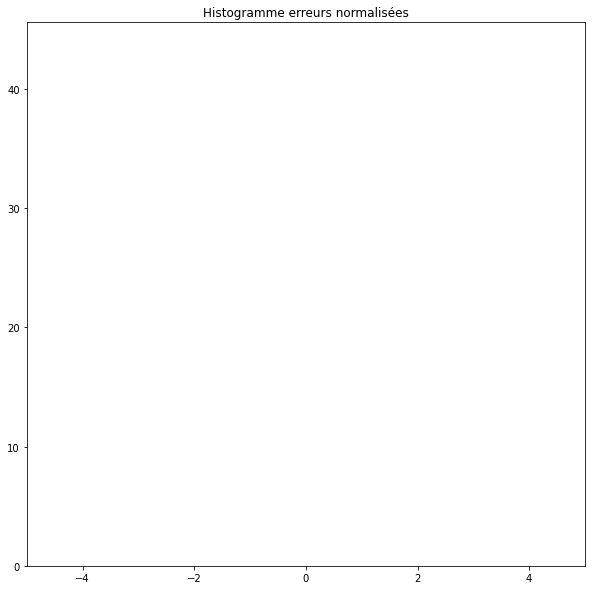

In [53]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlim([-5,5 ])
ax.hist(df_errors_val['errors_normalized'], bins=500, density=True)

plt.title('Histogramme erreurs normalisées')
plt.show()

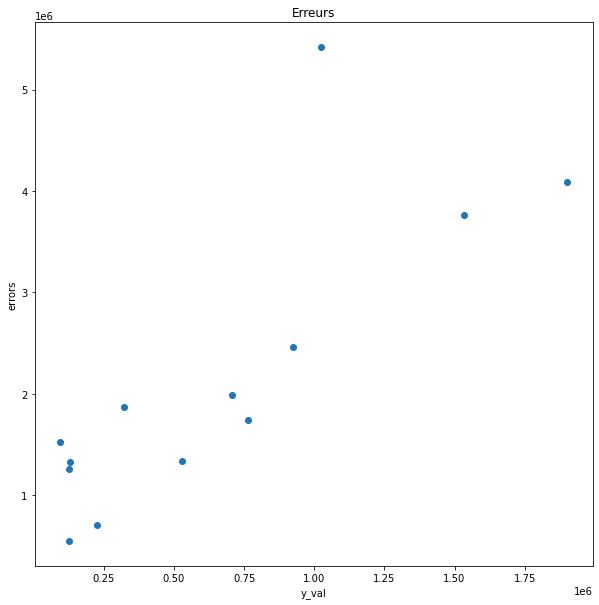

In [54]:
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(df_errors_val['y_true'], df_errors_val['errors'])
plt.xlabel('y_val')
plt.ylabel('errors')
plt.title('Erreurs')

plt.show()

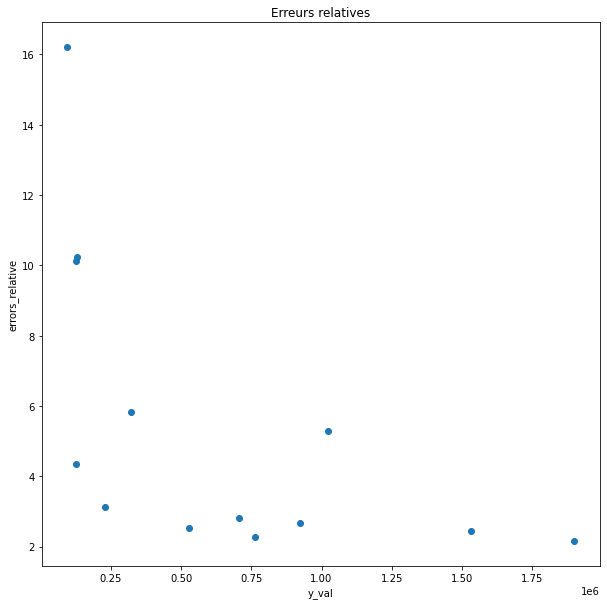

In [55]:
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(df_errors_val['y_true'], df_errors_val['errors_relative'])
plt.xlabel('y_val')
plt.ylabel('errors_relative')
plt.title('Erreurs relatives')

plt.show()

**Contraintes**

Temps d'execution : Inconnu   
Capacité de stockage : Inconnu

### Optimisation secondaire du meilleur modèle

Correlation et importance des variables dans les forets aléatoires

>Des simulations numériques confirment
d’une part les résultats theoriques et indiquent d’autre part que l’algorithme RFE tend a
selectionner un faible nombre de variables avec une bonne erreur de prédiction.

B.Gregorutti, B.Michel, P Saint-Pierre *Correlation et importance des variables dans les forets aléatoires* @Univ. Pierre et Marie Curie [source](http://papersjds14.sfds.asso.fr/submission_48.pdf)

**selection Recursive feature elimination**

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score

n_features_max = X_train.shape[1]          
high_score=0

best_n=0           
score_list =[]
for n in range(1,n_features_max):
    best_estimator = gscv_rfr.best_estimator_
    rfe = RFE(best_estimator, n_features_to_select = n)
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    scores = cross_val_score(best_estimator, X_train_rfe, y_train, cv=5,scoring='r2')
    score = np.mean(scores)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        best_n = n
        
print(f"Optimum number of features: {best_n}")
print(f"Score with {best_n} features: {high_score}")

In [ ]:
best_rfe = RFE(best_estimator, n_features_to_select = best_n)
X_train_rfe = best_rfe.fit_transform(X_train,y_train)
X_val_rfe = best_rfe.transform(X_val)
X_test_rfe = best_rfe.transform(X_test)
best_estimator.fit(X_train_rfe,y_train)

In [ ]:
X_val_rfe.shape

In [ ]:
y_pred_val = best_estimator.predict(X_val_rfe)
regression_report = regression_report.append(get_metrics(y_val, y_pred_val, 'best_estimator_rfe_on_val'))

In [ ]:
y_pred_train = best_estimator.predict(X_train_rfe)
regression_report = regression_report.append(get_metrics(y_train, y_pred_train, 'best_estimator_rfe_on_train'))

In [ ]:
rr = regression_report[regression_report.index.str.contains('val$')].sort_values(by=['r2_score'], ascending=False)

fig, ax = plt.subplots(figsize=(20,5))
plt.title('Val - Rapport de regression avec RFE')
sns.heatmap(rr,vmin=regression_report.max().Max,vmax=regression_report.max().Max, annot=True, cbar=None,linewidths=.5)

In [ ]:
regression_report[regression_report.index.str.contains('train$')].sort_values(by=['r2_score'], ascending=False)

In [ ]:
rr = regression_report[regression_report.index.str.contains('train$')].sort_values(by=['r2_score'], ascending=False)

fig, ax = plt.subplots(figsize=(20,5))
plt.title('Train - Rapport de regression avec RFE')
sns.heatmap(rr,vmin=regression_report.max().Max,vmax=regression_report.max().Max, annot=True, cbar=None,linewidths=.5)